In [ ]:
import numpy as np

In [ ]:
class KMeans:
    def __init__(self, k, max_iter=100):
        self.k = k # k=3
        self.max_iter = max_iter
        
    def fit(self, X):
        n_samples, n_features = X.shape # n_samples= 4, n_features=2
        
        # Initialize centroids randomly
        self.centroids = np.random.randn(self.k, n_features) # centroids is a 2D array with dimension of (3,2)
        
        # Iterate until convergence
        for i in range(self.max_iter):
            # Assign each sample to its closest centroid
            distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2)) # X->(4,2) 
            # [[1,2],      [[9,10],          [[11.31,8.49,5.65,2.83],     
            #  [3,4],   -   [11,12],   =      [14.14,11.31,8.49,5.65],     
            #  [5,6],       [13,14]]          [16.97,14.14,11.31,8.49]]    
            #  [7,8]]                     
            # distance is a 2D array where rows comprises of centroids and columns comprises of samples so dimension is (3,4)
            labels = np.argmin(distances, axis=0)
            
            # Update centroids as mean of samples assigned to them
            centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.k)])
            
            # Check for convergence
            if np.allclose(self.centroids, centroids):
                break
                
            self.centroids = centroids
            
        # Set labels_ attribute
        self.labels_ = labels


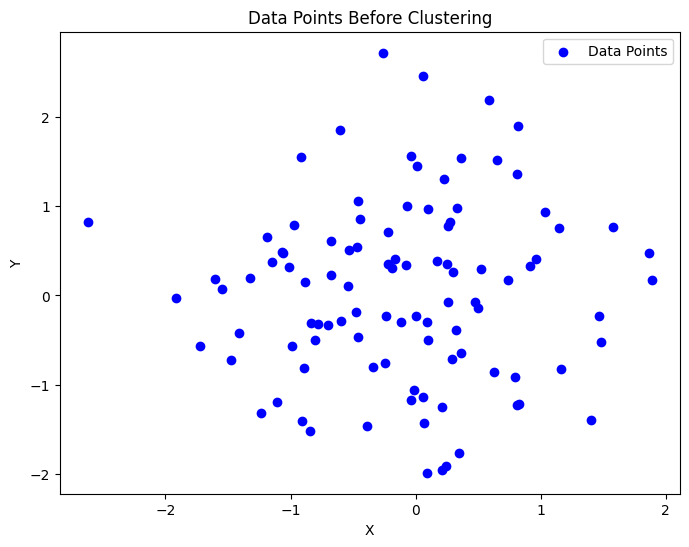

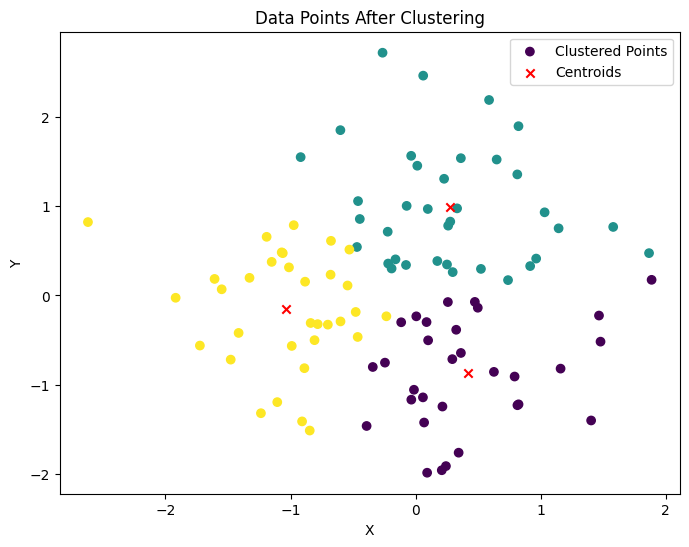

In [ ]:
import matplotlib.pyplot as plt

# Generate some random data
np.random.seed(42)
X = np.random.randn(100, 2)

# Plot data points before clustering
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], color='blue', label='Data Points')
plt.title('Data Points Before Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Create an instance of KMeans
kmeans = KMeans(k=3)

# Fit the data to KMeans
kmeans.fit(X)

# Get the labels assigned to each data point
labels = kmeans.labels_

# Get the centroids of each cluster
centroids= kmeans.centroids

# Plot data points after clustering
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', label='Clustered Points')
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', label='Centroids')
plt.title('Data Points After Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
